#  SI 221 HW 6 : k-means

CHEN Eric, POMBET Charles

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import random

## Exercice 1 

### Question 1

In [2]:
def data_set(sigma):
    mu_0 = [-1, 1]
    mu_1 = [1, 1]
    mu_2 = [0, 1]
    X, y = make_blobs(n_samples=300, centers=[mu_0, mu_1, mu_2], cluster_std=[sigma] * 3)
    return X,y

In [3]:
def distance(x1, x2):
    distance = sum([(x1[i]-x2[i])**2 for i in range(x1.shape[0])])**0.5
    return distance

In [4]:
def centroids(X,y):
    n = y.shape[0]
    index_c0 = []
    index_c1 = []
    index_c2 = []
    index_centers = []
    
    # Initiate the centroids and compute the distances
    for i in range(n):
        if (y[i] == 0):
            index_c0.append(i)
        if (y[i] == 1):
            index_c1.append(i)
        if (y[i] == 2):
            index_c2.append(i)
    center0 = random.choice(index_c0)
    center1 = random.choice(index_c1)
    center2 = random.choice(index_c2)
    index_centers.append(center0)
    index_centers.append(center1)
    index_centers.append(center2)
    return index_centers

In [17]:
def cost(X, y_pred, centroids, metrics = 2): 
    # metrics = 1 for L1-norm, 2 for L2-norm
    n = centroids.shape[0]
    cost = 0
    for i in range(n):
        for j in range(X.shape[0]):
            if (y_pred[j] == i):
                if (metrics == 2):
                    cost = cost + distance(X[j], centroids[i])**2
                if (metrics == 1):
                    cost = cost + distance_L1(X[j], centroids[i])
    return cost

In [6]:
def kmeans(X, y, index_centroids, nb_iter, threshold, metrics =2):
    n = y.shape[0]
    index_centers = index_centroids
    nb_class = len(index_centers)
    centers = [X[index_centers[i]] for i in range(nb_class)]
    y_pred = []
    for i in range(n):
        dist = []
        for j in range(nb_class):
            if (metrics == 2):
                dist.append(distance(X[i], centers[j]))
            if (metrics == 1):
                dist.append(distance_L1(X[i], centers[j]))
        y_pred.append(dist.index(min(dist)))
    cost_set = []
    cost_old = cost(X,y,np.array(centers),metrics=metrics)
    cost_new = cost(X,y_pred,np.array(centers),metrics=metrics)
    cost_set.append(cost_old)
    count = 0
    
    # the condition for while is a comment in order to compute the cost depending on the number of iterations 
    while((count < nb_iter)): #while((count < nb_iter and abs(cost_old - cost_new) > threshold) or count == 0) :
        y_pred = []
        for i in range(n):
            dist = []
            for j in range(nb_class):
                if (metrics == 2):
                    dist.append(distance(X[i], centers[j]))
                if (metrics == 1):
                    dist.append(distance_L1(X[i], centers[j]))
            y_pred.append(dist.index(min(dist)))

        # Compute the means of each cluster (update class center)
        centers = [[0,0] for i in range(nb_class)]
        for i in range(n):
            centers[y_pred[i]] = centers[y_pred[i]] + X[i]
        for j in range(nb_class):
            counter = y_pred.count(j)
            if (counter != 0):
                centers[j] = centers[j]/counter
        cost_old = cost_new
        cost_new = cost(X,y_pred,np.array(centers),metrics=metrics)
        cost_set.append(cost_new)
        count = count + 1
    centers = np.array(centers)
    y_pred = np.array(y_pred)
    cost_set = np.array(cost_set)
    return y_pred, centers, cost_set

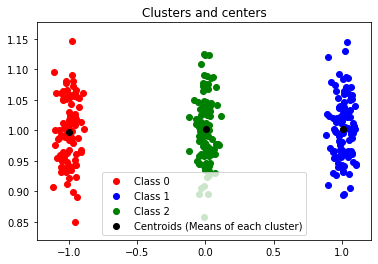

In [7]:
X,y = data_set(0.05)
index_centers = centroids(X,y)
y_pred, centers, cost_set = kmeans(X,y,index_centers,50, 0.01)
lab0 = np.where(y_pred == 0)[0]
lab1 = np.where(y_pred == 1)[0]
lab2 = np.where(y_pred == 2)[0]
plt.title("Clusters and centers")
plt.scatter(X[lab0,0], X[lab0,1], c='r', label = "Class 0")
plt.scatter(X[lab1,0], X[lab1,1], c='b', label = "Class 1")
plt.scatter(X[lab2,0], X[lab2,1], c='g', label = "Class 2")
plt.scatter(centers[:,0], centers[:,1], c='black', label = "Centroids (Means of each cluster)")
plt.legend()
plt.show()

### Question 2 

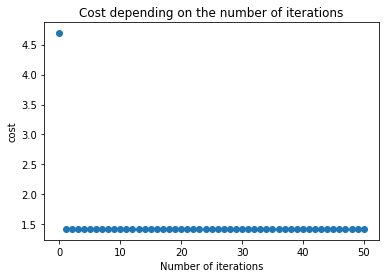

In [8]:
# Plot the cost(t)
X,y = data_set(0.05)
index_centers = centroids(X,y)
y_pred, centers, cost_set = kmeans(X,y,index_centers,50,0.01)
plt.scatter(range(0,51), cost_set)
plt.title("Cost depending on the number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.show()

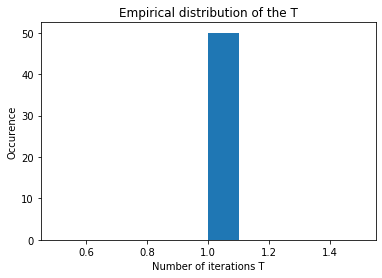

In [9]:
# Repeat 50 times
T_set = []
for i in range(50):
    X,y = data_set(0.05)
    index_centers = centroids(X,y)
    y_pred, centers, cost_set = kmeans(X,y,index_centers,50, 0.01)
    j = 0
    while (cost_set[j] != cost_set[j+1]):
        j = j+1
    T_set.append(j)
T_set = np.array(T_set)
plt.hist(T_set)
plt.title("Empirical distribution of the T")
plt.xlabel('Number of iterations T')
plt.ylabel('Occurence')
plt.show()

### Question 3 

In [10]:
def random_centroids(X,y,K): # K is the number of class
    index_centroids = []
    n = y.shape[0]
    for i in range(K):
        index_centroids.append(random.randint(0,n-1))
    return index_centroids

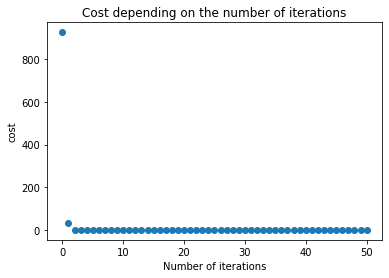

In [13]:
# Plot the cost(t)
X,y = data_set(0.05)
index_centers = random_centroids(X,y,3)
y_pred, centers, cost_set = kmeans(X,y,index_centers,50,0.01)
plt.scatter(range(0,51), cost_set)
plt.title("Cost depending on the number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.show()

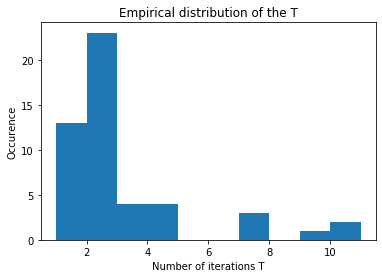

In [14]:
# Repeat 50 times
T_set = []
for i in range(50):
    X,y = data_set(0.05)
    index_centers = random_centroids(X,y,3)
    y_pred, centers, cost_set = kmeans(X,y,index_centers,50,0.01)
    j = 0
    while (cost_set[j] != cost_set[j+1]):
        j = j+1
    T_set.append(j)
T_set = np.array(T_set)
plt.hist(T_set)
plt.title("Empirical distribution of the T")
plt.xlabel('Number of iterations T')
plt.ylabel('Occurence')
plt.show()

### Question 4 

For sigma = 0.1


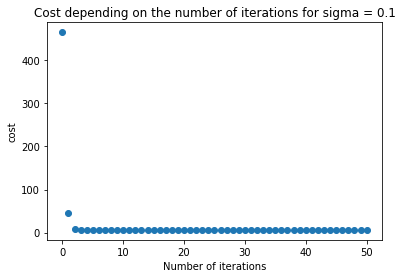

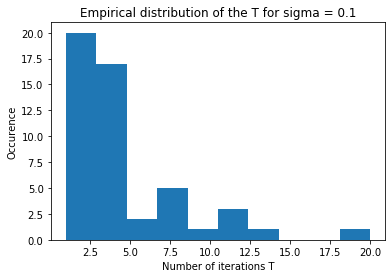

For sigma = 0.2


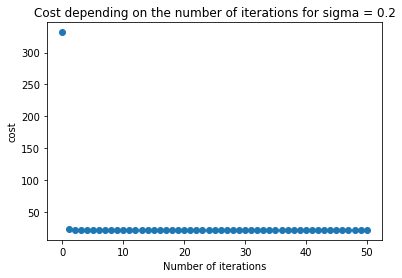

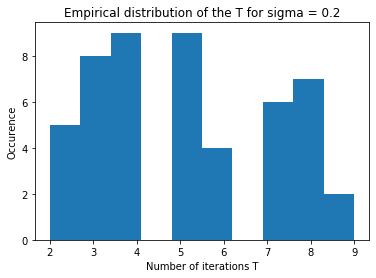

For sigma = 0.3


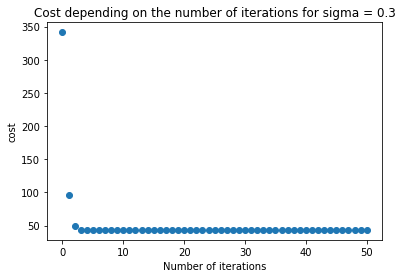

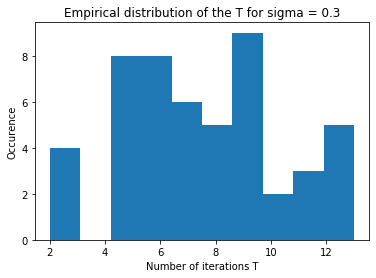

In [15]:
sigma_set = [0.1, 0.2, 0.3]
for sigma in sigma_set:
    print("For sigma = " + str(sigma))
    # Plot the cost(t)
    X,y = data_set(sigma)
    index_centers = random_centroids(X,y,3)
    y_pred, centers, cost_set = kmeans(X,y,index_centers,50,0.01)
    plt.figure()
    plt.scatter(range(0,51), cost_set)
    plt.title("Cost depending on the number of iterations for sigma = " + str(sigma))
    plt.xlabel("Number of iterations")
    plt.ylabel("cost")
    plt.show()

    # Repeat 50 times
    T_set = []
    for i in range(50):
        X,y = data_set(sigma)
        index_centers = random_centroids(X,y,3)
        y_pred, centers, cost_set = kmeans(X,y,index_centers,50,0.01)
        j = 0
        while (cost_set[j] != cost_set[j+1]):
            j = j+1
        T_set.append(j)
    T_set = np.array(T_set)
    plt.hist(T_set)
    plt.title("Empirical distribution of the T for sigma = " + str(sigma))
    plt.xlabel('Number of iterations T')
    plt.ylabel('Occurence')
    plt.show()

### Question 5 

$$cost = \sum_{i=1}^{k}\sum_{x_{j}\in C_{i}} ||x_{j}-\mu_{i}||^{2}$$
$$\frac{\partial{cost}}{\partial{\mu_{i}}} = -2\sum_{x_{j}\in C_{i}} (x_{j}-\mu_{i})$$

We want $\frac{\partial{cost}}{\partial{\mu_{i}}} = 0$
$$\sum_{x_{j}\in C_{i}} x_{j}= \sum_{x_{j}\in C_{i}}\mu_{i}$$
$$\sum_{x_{j}\in C_{i}} x_{j}= |C_{i}|\mu_{i}$$
$$\mu_{i} = \frac{\sum_{x_{j}\in C_{i}} x_{j}}{|C_{i}|}$$
**As a result, when minimizing the cost over centroids, the centroids that minimize the cost are indeed the means of their cluster (cost is a convex function).**

### Question 6 

#### a) 

**By using the L1 norm, we can observe that the value of the cost is not converging towards a value close to 0 whereas for the L2 norm, it is the case for K-means algorithm. As a result, we should use another way to compute the centroids in respect of the L1 norm.**

In [16]:
def distance_L1(x1, x2):
    distance = sum([abs(x1[i]-x2[i]) for i in range(x1.shape[0])])
    return distance

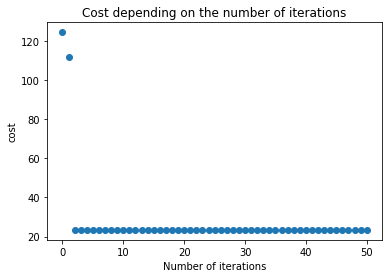

In [18]:
# Plot the cost(t)
X,y = data_set(0.05)
index_centers = random_centroids(X,y,3)
y_pred, centers, cost_set = kmeans(X,y,index_centers,50, 0.01, metrics = 1)
plt.scatter(range(0,51), cost_set)
plt.title("Cost depending on the number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.show()

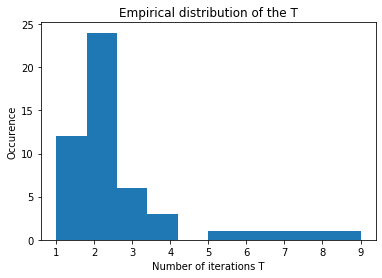

In [19]:
# Repeat 50 times
T_set = []
for i in range(50):
    X,y = data_set(0.05)
    index_centers = random_centroids(X,y,3)
    y_pred, centers, cost_set = kmeans(X,y,index_centers,50, 0.01, metrics = 1)
    j = 0
    while (cost_set[j] != cost_set[j+1]):
        j = j+1
    T_set.append(j)
T_set = np.array(T_set)
plt.hist(T_set)
plt.title("Empirical distribution of the T")
plt.xlabel('Number of iterations T')
plt.ylabel('Occurence')
plt.show()

#### b)

**When we modify the way to compute the centroids by using median vectors instead of the average, we can see that the cost function is converging towards a value close to 0. It is because we are using the L1 norm for k-median algorithm which is more adapted compared to k-means algorithm for L1 norm. Thus, the results are satisfying.**

**Remark : k-median algorithm is less sensitive to outliers compared to k-means because we are using the median instead of the mean.**

In [20]:
def kmedian(X, y, index_centroids, nb_iter, threshold):
    n = y.shape[0]
    index_centers = index_centroids
    nb_class = len(index_centers)
    centers = [X[index_centers[i]] for i in range(nb_class)]
    y_pred = []
    for i in range(n):
        dist = []
        for j in range(nb_class):
            dist.append(distance_L1(X[i], centers[j]))
        y_pred.append(dist.index(min(dist)))
    cost_set = []
    cost_old = cost(X,y,np.array(centers),metrics=1)
    cost_new = cost(X,y_pred,np.array(centers),metrics=1)
    cost_set.append(cost_old)
    count = 0
    
    # the condition for while is a comment in order to compute the cost depending on the number of iterations 
    while((count < nb_iter)): #while((count < nb_iter and abs(cost_old - cost_new) > threshold) or count == 0) :
        y_pred = []
        for i in range(n):
            dist = []
            for j in range(nb_class):
                dist.append(distance_L1(X[i], centers[j]))
            y_pred.append(dist.index(min(dist)))

        # Compute the median of each cluster (update class center)
        for i in range(nb_class):
            centers[i] = np.median(np.array([X[j] for j in range(n) if (y[j]==i)]), axis = 0)
        cost_old = cost_new
        cost_new = cost(X,y_pred,np.array(centers),metrics=1)
        cost_set.append(cost_new)
        count = count + 1
    centers = np.array(centers)
    y_pred = np.array(y_pred)
    cost_set = np.array(cost_set)
    return y_pred, centers, cost_set

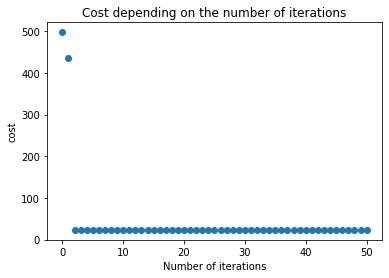

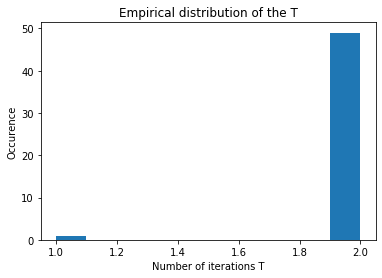

In [21]:
# Plot the cost(t)
X,y = data_set(0.05)
index_centers = random_centroids(X,y,3)
y_pred, centers, cost_set = kmedian(X,y,index_centers,50, 0.01)
plt.scatter(range(0,51), cost_set)
plt.title("Cost depending on the number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.show()

# Repeat 50 times
T_set = []
for i in range(50):
    X,y = data_set(0.05)
    index_centers = random_centroids(X,y,3)
    y_pred, centers, cost_set = kmedian(X,y,index_centers,50, 0.01)
    j = 0
    while (cost_set[j] != cost_set[j+1]):
        j = j+1
    T_set.append(j)
T_set = np.array(T_set)
plt.hist(T_set)
plt.title("Empirical distribution of the T")
plt.xlabel('Number of iterations T')
plt.ylabel('Occurence')
plt.show()

#### c)

$$cost = \sum_{i=1}^{k}\sum_{x_{j}\in C_{i}} |x_{j}-\mu_{i}|$$
**We can consider the cost function restricted to one cluster.**
**We're basically after: $argmin_{\mu_{k}} \sum_{x_{j}\in C_{i}} |x_{j}-\mu_{i}|$**

**When we derive the function, we have $\sum_{x_{j}\in C_{i}} sign(x_{j}-\mu_{i})$** 

**This equals to zero only when there is an equal number of positive  and negative terms.**
**This fact happens when $\mu_{i}$ = median {$x_{j}$ s.t $x_{j} \in C_{i}$} by definition of the median which separates the set in two equal parts.**

## Exercice 2 

In [1]:
#KMeans for color quantization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.spatial import distance

In [2]:
def codebook (source, n_points):
    codebook = shuffle(source, random_state=0)[:n_points]
    return codebook

In [3]:
def assign_samples (codebook, samples):
    cl =[]
    for i in range(samples.shape[0]):
        s_i = np.transpose(samples[i].reshape(samples[i].shape[0],-1)) #to convert 1d array in 2d array
        dist_i = distance.cdist(s_i, codebook, 'euclidean')
        cl_i = np.argmin(dist_i)
        cl.append(cl_i)
    return cl

In [4]:
def calculate_centroids(samples, codebook, cl, n_points):
    #centroid = codebook.copy() 
    centroid = np.zeros(codebook.shape)
    #TO FILL HERE!    
    for i in range(len(cl)):
        centroid[cl[i]] = centroid[cl[i]] + samples[i]
    for j in range(n_points):
        counter = cl.count(j)
        if (counter != 0):
            centroid[j] = centroid[j]/counter
    return centroid

In [5]:
def convergence(samples, codebook_old, codebook_current, thr, cl):
    # FILL HERE!
    # Compute here delta_inertia as the difference between the current inertia (compute on the current codebook) 
    # and the inertia at the previous step (computed on the old codebook)
    
    inertia_old = inertia(samples, codebook_old, cl)
    cl_new = assign_samples(codebook_current, samples)
    inertia_new = inertia(samples, codebook_current, cl_new)
    
    delta_inertia = inertia_new - inertia_old
        
    if (delta_inertia > 0 and delta_inertia < thr):
        return True
    else:
        return False
    


In [6]:
def inertia (samples, codebook, cl):
    dist =[]
    for i in range(codebook.shape[0]):
        s_i = np.array([samples[j] for j in np.where(np.array(cl)==i)])
    
        if s_i.size==0:
            continue
        else:
            s_i=np.hstack((s_i))
            s_i = s_i.reshape(s_i.shape[0],-1) #to convert 1d array in 2d array
            c_i = np.transpose(codebook[i].reshape(codebook[i].shape[0],-1))
          
            dist_i_sqr = (distance.cdist(s_i, c_i, 'euclidean'))**2
            dist_i_sqr_sum = np.sum(dist_i_sqr)
            dist.append(dist_i_sqr_sum)
    value_inertia = np.sum(dist)
    return value_inertia

In [7]:
def KMeans (codebook, samples, thr, max_it):
    count = 1
    n_points = len(codebook)
    cls = assign_samples(codebook, samples)
    centroids = calculate_centroids(samples, codebook, cls, n_points) 
    while (convergence(samples, codebook, centroids, thr, cls)== False and count <= max_it): 
        #TO FILL HERE!
        codebook = centroids
        cls = assign_samples(codebook, samples)
        centroids = calculate_centroids(samples, codebook, cls, n_points)
        count = count + 1
    return cls

In [8]:
def recreate_image(codb, lab, w, h, d):
    img = np.zeros((w,h, d))   
    label_idx = 0
    for i in range(w):
        for j in range(h):
            img[i][j]=codb[lab[label_idx]]
            label_idx = label_idx +1
    return img

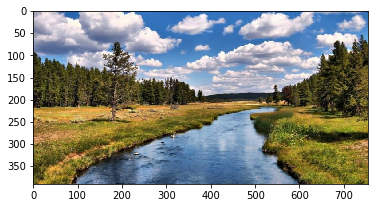

In [9]:
#Reading image
image = plt.imread('data/landscape.jpg')
image_ = image.astype(float) / 255
plt.imshow(image)

In [10]:
w, h, d = original_shape = tuple(image.shape)


assert d == 3
image_array = np.reshape(image, (w * h, d))

In [11]:
n_colors = 64

threshold = 0.01
max_iterations = 3

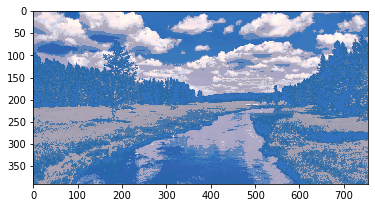

In [12]:
#using 64 points from the fist 500 top points 
codebook_random_1 = codebook(image_array[:500], n_colors)

l = KMeans(codebook_random_1, image_array, threshold, max_iterations)

image_1 = recreate_image(codebook_random_1, l, w, h, d)
image_1 = image_1.astype(float) / 255

plt.figure()
plt.imshow(image_1)

In [13]:
#using 64 points from the whole image
codebook_random_2 = codebook(image_array, n_colors)

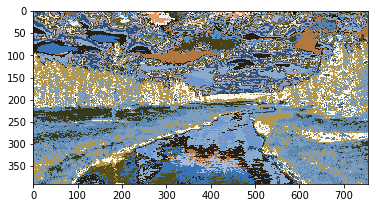

In [14]:
ll = KMeans(codebook_random_2, image_array, threshold, max_iterations)

image_2 = recreate_image(codebook_random_2, l, w, h, d)
image_2 = image_2.astype(float) / 255

plt.figure()
plt.imshow(image_2)

### Questions 

In [15]:
print("The height of the image landscape.jpg is "+str(w)+ " and its width is "+str(h))

The height of the image landscape.jpg is 390 and its width is 755


**m represents the number of samples, which is here the number of pixels.** 

**n represents the number of color channels (3 here).**

**The instruction image_array = np.reshape(image, (w * h, d)) converts image to a 2d array.**

Influence of max_iterations


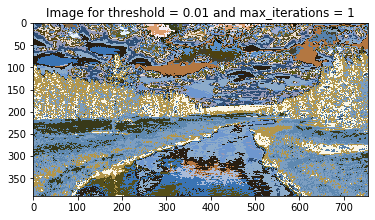

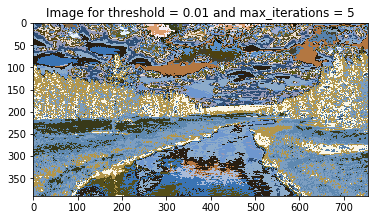

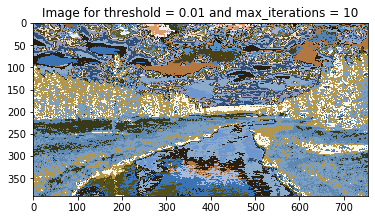

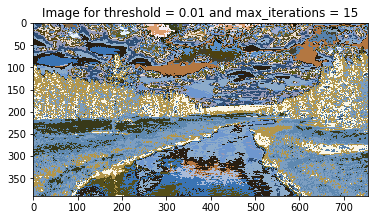

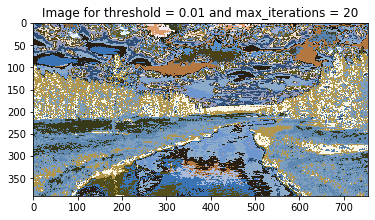

In [16]:
print("Influence of max_iterations")
max_iterations_set = [1, 5, 10, 15, 20]
codebook_random_2 = codebook(image_array, n_colors)
threshold = 0.01

for max_iterations in max_iterations_set:
    ll = KMeans(codebook_random_2, image_array, threshold, max_iterations)
    image_2 = recreate_image(codebook_random_2, l, w, h, d)
    image_2 = image_2.astype(float) / 255
    plt.figure()
    plt.title("Image for threshold = "+str(threshold) + " and max_iterations = "+str(max_iterations))
    plt.imshow(image_2)

Influence of threshold


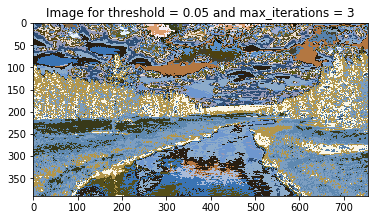

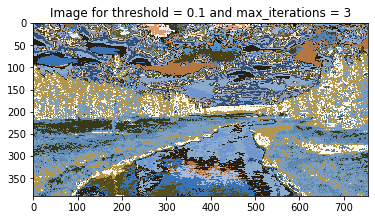

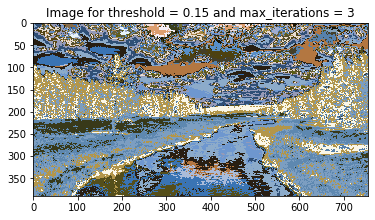

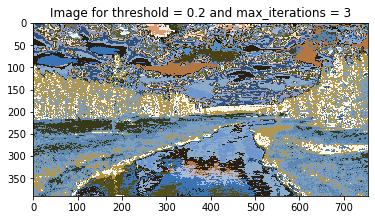

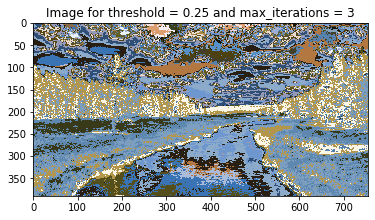

In [17]:
print("Influence of threshold")
threshold_set = [0.05, 0.1, 0.15, 0.2, 0.25]
max_iterations = 3

for threshold in threshold_set:
    ll = KMeans(codebook_random_2, image_array, threshold, max_iterations)
    image_2 = recreate_image(codebook_random_2, l, w, h, d)
    image_2 = image_2.astype(float) / 255
    plt.figure()
    plt.title("Image for threshold = "+str(threshold) + " and max_iterations = "+str(max_iterations))
    plt.imshow(image_2)

**When we change the parameters' values, we note that they don't affect very much the results. As a consequence, it is possible to say that the results of k-means algorithm for this image depend greatly on the initialisation and the choice of the initial centroids rather than the values of the threshold or the maximum number of iterations.**

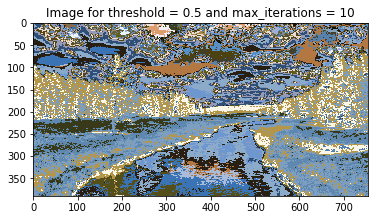

In [18]:
threshold = 0.5
max_iterations = 10

ll = KMeans(codebook_random_2, image_array, threshold, max_iterations)
image_2 = recreate_image(codebook_random_2, l, w, h, d)
image_2 = image_2.astype(float) / 255
plt.figure()
plt.title("Image for threshold = "+str(threshold) + " and max_iterations = "+str(max_iterations))
plt.imshow(image_2)

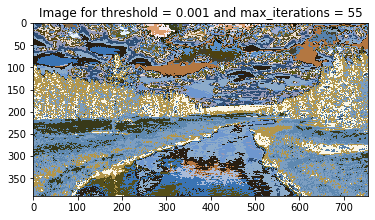

In [19]:
threshold = 0.001
max_iterations = 55

ll = KMeans(codebook_random_2, image_array, threshold, max_iterations)
image_2 = recreate_image(codebook_random_2, l, w, h, d)
image_2 = image_2.astype(float) / 255
plt.figure()
plt.title("Image for threshold = "+str(threshold) + " and max_iterations = "+str(max_iterations))
plt.imshow(image_2)